# Comparison of normal and Approximate KSVD

See performance difference of normal KSVD and Approximiate KSVD implementations with changing

* number of input samples
* number of input features
* number of components of dictionary

References

* [Efficient Implementation of the K-SVD Algorithm
using Batch Orthogonal Matching Pursuit](http://www.cs.technion.ac.il/~ronrubin/Publications/KSVD-OMP-v2.pdf)

In [1]:
import time
import sys

# To load tests module, we need to add parent directory at the beginning of sys.path
sys.path.insert(0, '..')
from spmimage.decomposition import KSVD

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1

In [12]:
# Functions

np.random.seed(0)

from tests.test_decomposition_ksvd import generate_dictionary_and_samples

def run_ksvd(n_samples, n_features, n_components, k0, max_iter):
    A0, X = generate_dictionary_and_samples(n_samples, n_features, n_components, k0)

    elapsed = []
    error = []
    n_iter = []
    for method in ['normal', 'approximate']:
        start = time.time()
        model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter, method=method)
        model.fit(X)
        elapsed.append(time.time() - start)
        error.append(model.error_[-1])
        n_iter.append(model.n_iter_)
    return elapsed, error, n_iter


def show_plot(x, data, title):
    normal, approx = zip(*data)
    plt.plot(x, normal, label='normal')
    plt.plot(x, approx, label='approximate')
    plt.title(title)
    plt.xticks(x[1::2], x[1::2])
    plt.grid()
    plt.legend()    


def show_results(x, elapsed_times, errors, n_iters, suptitle):
    
    plt.figure(figsize=(14, 4))
    plt.suptitle(suptitle)
    
    plt.subplot(1, 3, 1)
    show_plot(x, elapsed_times, 'elapsed time')
    
    plt.subplot(1, 3, 2)
    show_plot(x, errors, 'error')    
    
    plt.subplot(1, 3, 3)
    show_plot(x, n_iters, 'iteration')        
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)


## sample size comparison

In [3]:
# Set Parameters
k0 = 4
n_features = 100
n_components = 10
max_iter = 1000

sample_num = range(100, 1000, 50)

In [4]:
%%time

elapsed_times = []
errors = []
n_iters = []

for n_samples in sample_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter)    

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 9min 24s, sys: 23.3 s, total: 9min 48s
Wall time: 9min 22s


CPU times: user 153 ms, sys: 5.5 ms, total: 159 ms
Wall time: 189 ms


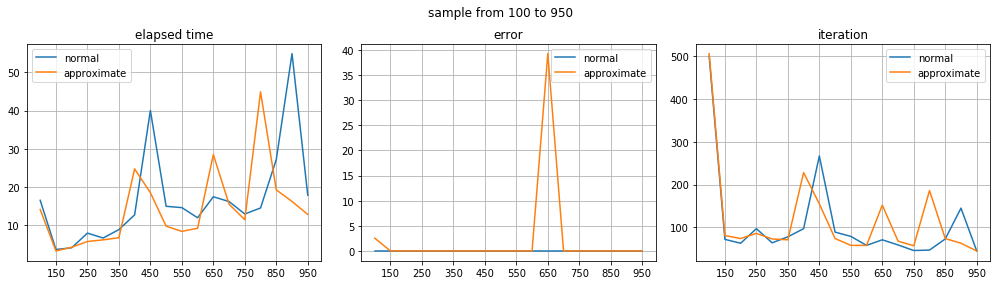

In [5]:
%%time
show_results(sample_num, elapsed_times, errors, n_iters, 'sample from {0} to {1}'.format(sample_num[0], sample_num[-1]))

## feature size comparison

In [13]:
# Set Parameters
k0 = 4
n_samples = 200
n_components = 10
max_iter = 1000

feature_num = range(100, 1000, 100)

In [14]:
%%time

elapsed_times = []
errors = []
n_iters = []

for n_features in feature_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter)

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 10min 22s, sys: 50.3 s, total: 11min 12s
Wall time: 8min 3s


CPU times: user 125 ms, sys: 17.7 ms, total: 143 ms
Wall time: 143 ms


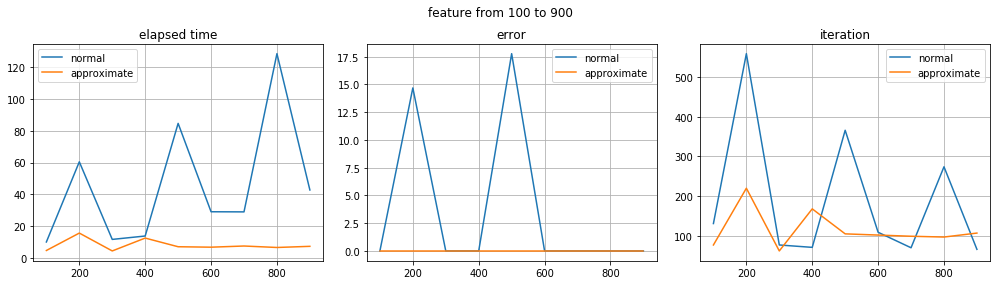

In [15]:
%%time
show_results(feature_num, elapsed_times, errors, n_iters, 'feature from {0} to {1}'.format(feature_num[0], feature_num[-1]))

## component size comparison

In [9]:
# Set Parameters
k0 = 4
n_samples = 200
n_features = 100
max_iter = 1000

component_num = range(10, 100, 5)

In [10]:
%%time

elapsed_times = []
errors = []
n_iters = []

for n_component in component_num:
    elapsed, error, n_iter = run_ksvd(n_samples, n_features, n_components, k0, max_iter)
    elapsed_times.append(elapsed)
    errors.append(error)
    n_iters.append(n_iter) 

/Users/takashi/Documents/workspace-ml/spm-image/examples_venv/lib/python3.5/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


CPU times: user 5min 10s, sys: 11.1 s, total: 5min 21s
Wall time: 5min 15s


CPU times: user 138 ms, sys: 4.58 ms, total: 143 ms
Wall time: 152 ms


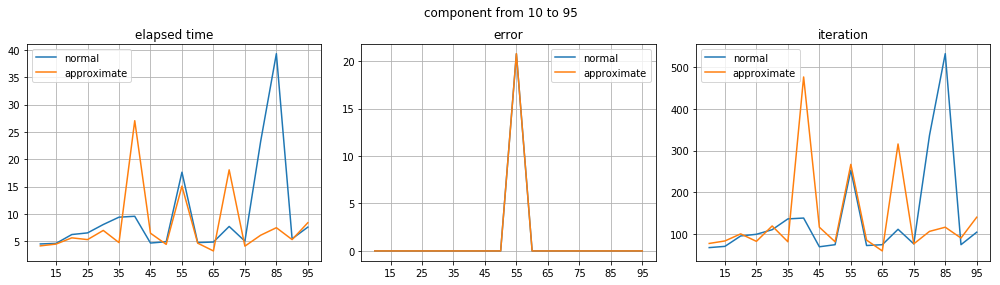

In [11]:
%%time
show_results(component_num, elapsed_times, errors, n_iters, 'component from {0} to {1}'.format(component_num[0], component_num[-1]))